In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator


2026-02-01 17:47:03.806170: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-01 17:47:03.833587: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2026-02-01 17:47:03.833617: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2026-02-01 17:47:03.834379: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2026-02-01 17:47:03.839182: I tensorflow/core/platform/cpu_feature_guar

In [2]:

# --- 1. EXPLORATORY DATA ANALYSIS (EDA) ---
DATASET_PATH = 'dataset'
classes = ['fully_covered', 'not_covered', 'partially_covered']

--- Starting EDA ---


/tmp/ipykernel_16690/3065737679.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette='viridis')


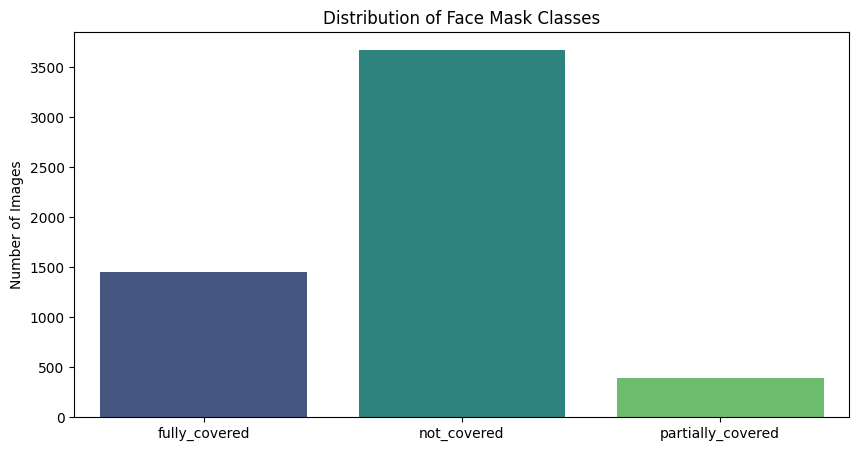

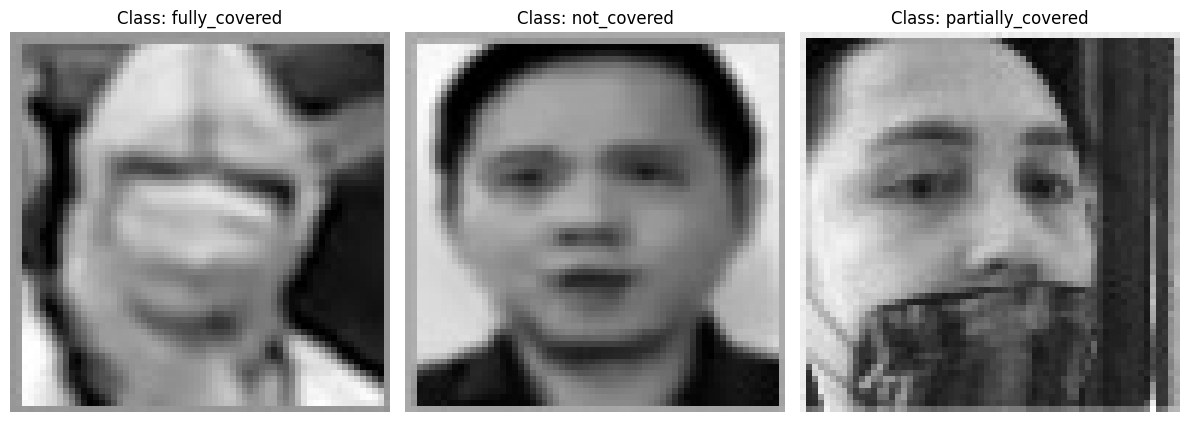

In [3]:

def perform_eda():
    print("--- Starting EDA ---")
    counts = {}
    for cls in classes:
        path = os.path.join(DATASET_PATH, cls)
        counts[cls] = len(os.listdir(path))
    
    # Plot Class Distribution
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette='viridis')
    plt.title('Distribution of Face Mask Classes')
    plt.ylabel('Number of Images')
    plt.show()

    # Visualize Samples
    plt.figure(figsize=(12, 6))
    for i, cls in enumerate(classes):
        path = os.path.join(DATASET_PATH, cls)
        img_name = os.listdir(path)[0]
        img_path = os.path.join(path, img_name)
        
        img = tf.keras.utils.load_img(img_path, color_mode='grayscale', target_size=(64, 64))
        plt.subplot(1, 3, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Class: {cls}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

perform_eda()

In [4]:


# --- 2. DATA PREPARATION ---
# Adding Augmentation to improve generalization since we're building from scratch
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

In [5]:

train_gen = datagen.flow_from_directory(
    DATASET_PATH, target_size=(64, 64), batch_size=32,
    color_mode='grayscale', class_mode='categorical', subset='training'
)

val_gen = datagen.flow_from_directory(
    DATASET_PATH, target_size=(64, 64), batch_size=32,
    color_mode='grayscale', class_mode='categorical', subset='validation',
    shuffle=False # Keep false for Analysis/Confusion Matrix
)

Found 4407 images belonging to 3 classes.
Found 1100 images belonging to 3 classes.


In [6]:

# --- 3. MODEL ARCHITECTURE ---
model = models.Sequential([
    layers.Input(shape=(64, 64, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


2026-02-01 17:47:05.249395: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2026-02-01 17:47:05.278001: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2026-02-01 17:47:05.279918: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [7]:


# --- 4. TRAINING ---
history = model.fit(train_gen, validation_data=val_gen, epochs=25)


Epoch 1/25


2026-02-01 17:47:06.064656: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2026-02-01 17:47:06.136296: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2026-02-01 17:47:06.343829: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2026-02-01 17:47:06.825488: I external/local_xla/xla/service/service.cc:168] XLA service 0x7c0638d38b20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2026-02-01 17:47:06.825509: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
2026-02-01 17:47:06.832947: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1769947326.922980   16797 d

138/138 [==============================] - 6s 25ms/step - loss: 0.6935 - accuracy: 0.7155 - val_loss: 0.4930 - val_accuracy: 0.8336
Epoch 2/25
138/138 [==============================] - 3s 18ms/step - loss: 0.4543 - accuracy: 0.8275 - val_loss: 0.3585 - val_accuracy: 0.8545
Epoch 3/25
138/138 [==============================] - 2s 18ms/step - loss: 0.3548 - accuracy: 0.8559 - val_loss: 0.3073 - val_accuracy: 0.8600
Epoch 4/25
138/138 [==============================] - 3s 18ms/step - loss: 0.3374 - accuracy: 0.8650 - val_loss: 0.2835 - val_accuracy: 0.8955
Epoch 5/25
138/138 [==============================] - 2s 17ms/step - loss: 0.3071 - accuracy: 0.8888 - val_loss: 0.2773 - val_accuracy: 0.9073
Epoch 6/25
138/138 [==============================] - 3s 18ms/step - loss: 0.2888 - accuracy: 0.8868 - val_loss: 0.2396 - val_accuracy: 0.9073
Epoch 7/25
138/138 [==============================] - 3s 18ms/step - loss: 0.2715 - accuracy: 0.9008 - val_loss: 0.2142 - val_accuracy: 0.9282
Epoch 8/25

In [8]:

# --- 5. POST-TRAINING ANALYSIS ---
def plot_analysis(history):
    # Plot Accuracy & Loss Curves
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.title('Accuracy Curves')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.title('Loss Curves')
    plt.legend()
    plt.show()



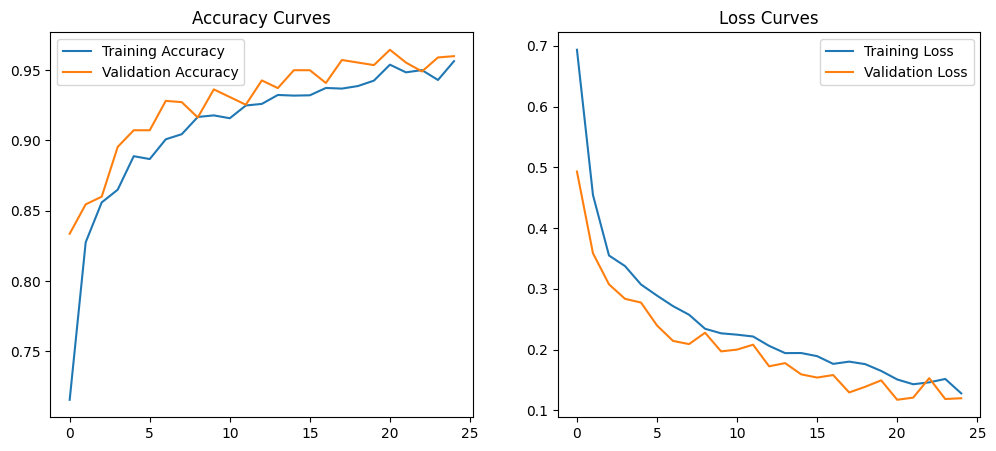

35/35 [==============================] - 1s 13ms/step


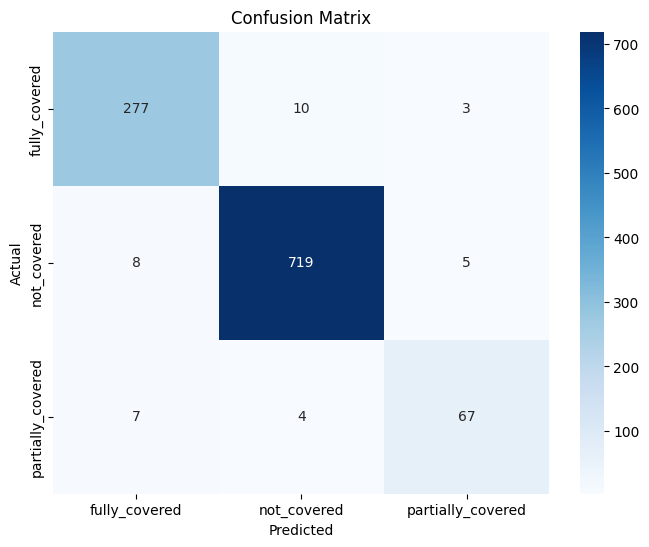


--- Classification Report ---
                   precision    recall  f1-score   support

    fully_covered       0.95      0.96      0.95       290
      not_covered       0.98      0.98      0.98       732
partially_covered       0.89      0.86      0.88        78

         accuracy                           0.97      1100
        macro avg       0.94      0.93      0.94      1100
     weighted avg       0.97      0.97      0.97      1100



In [9]:

def detailed_report(model, val_gen):
    # Confusion Matrix
    Y_pred = model.predict(val_gen)
    y_pred = np.argmax(Y_pred, axis=1)
    
    cm = confusion_matrix(val_gen.classes, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    print("\n--- Classification Report ---")
    print(classification_report(val_gen.classes, y_pred, target_names=classes))

plot_analysis(history)
detailed_report(model, val_gen)


In [10]:
model.save('mask_model.h5')

/home/ubuntuwu/anaconda3/envs/mask-det/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
